<a href="https://colab.research.google.com/github/dmarx/1click-hpc/blob/main/simple_audioreactivity_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yt-dlp
url = "https://www.youtube.com/watch?v=0S43IwBF0uM"
!yt-dlp --extract-audio --audio-format mp3 {url}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 21.6 MB/s eta 0:00:00
[youtube] Extracting URL: https://www.youtube.com/watch?v=0S43IwBF0uM
[youtube] 0S43IwBF0uM: Downloading webpage
[youtube] 0S43IwBF0uM: Downloading android player API JSON
[info] 0S43IwBF0uM: Downloading 1 format(s): 251
[dashsegments] Total fragments: 1
[download] Destination: The Chemical Brothers - Star Guitar (Official Music Video) [0S43IwBF0uM].webm
[download] 100% of    3.28MiB in 00:00:00 at 26.24MiB/s
[ExtractAudio] Destination: The Chemical Brothers - Star Guitar (Official Music Video) 

In [2]:
import librosa

In [3]:
from pathlib import Path 

music_file_name = list(Path('.').glob('*.mp3'))[0]
#print(music_file_name)

# https://librosa.org/doc/latest/effects.html
y, sr = librosa.load(music_file_name)
y_harmonic, y_percussive = librosa.effects.hpss(y)

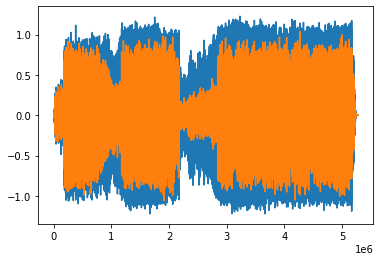

In [4]:
from matplotlib import pyplot as plt 

plt.plot(y)
#plt.plot(y_harmonic)
plt.plot(y_percussive)

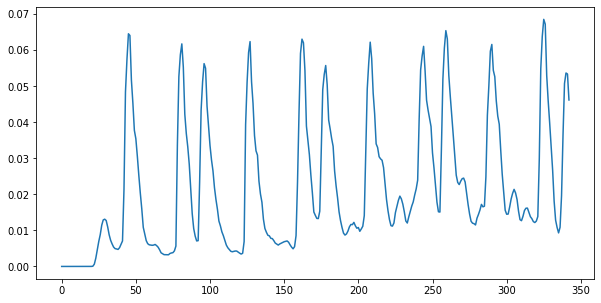

In [5]:
y_perc_rms = librosa.feature.rms(y_percussive)
#plt.plot(y_perc_rms)
y_perc_rms.shape
plt.figure(figsize=(10,5))
plt.plot(y_perc_rms[0][:len(y_perc_rms[0])//30])


In [6]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

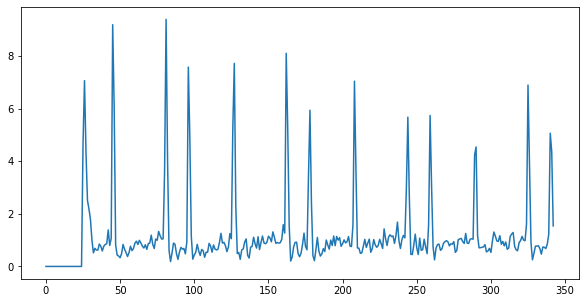

In [7]:
plt.figure(figsize=(10,5))
plt.plot(o_env[:len(o_env)//30])


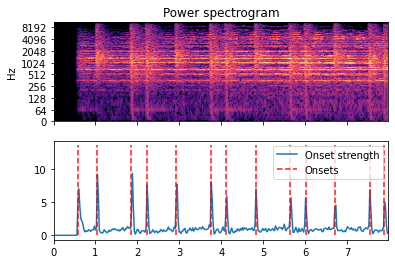

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

D = np.abs(librosa.stft(y[:len(y)//30]))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()

In [ ]:
# #onset_frames[-1]
# import pandas as pd

# S = pd.Series(o_env[onset_frames], index = onset_frames)

# S = S.reindex(list(range(0, S.index.max()+1)), fill_value=0)
# S.index.max()

10108

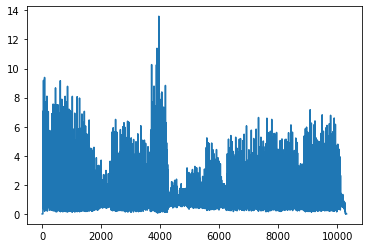

In [ ]:
plt.plot(o_env)

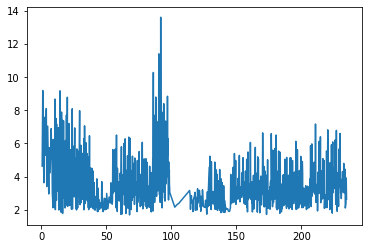

In [ ]:
plt.plot(times[onset_frames], o_env[onset_frames])

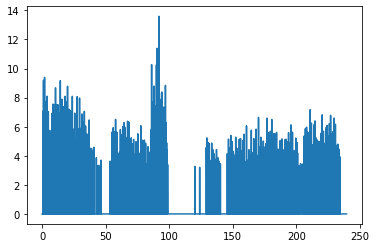

In [10]:

o_env_frames = o_env[onset_frames]
times_frames = times[onset_frames]

thresh = np.quantile(o_env_frames, q=.5)


#idx = np.where(o_env_frames > thresh)
#plt.plot(times[onset_frames][idx], o_env[onset_frames][idx])

o_env_threshed = o_env[:]
o_env_threshed[o_env_threshed < thresh] = 0

plt.plot(times, o_env_threshed)

In [11]:
%pip install stability-sdk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.3
    Uninstalling grpcio-1.51.3:
      Successfully uninstalled grpcio-1.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.48.2 requires grpcio>=1.48.2, but you have grpcio 1.48.1 which is incompati

In [12]:
import getpass, os

# NB: host url is not prepended with \"https\" nor does it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# To get your API key, visit https://beta.dreamstudio.ai/membership
os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

Enter your API Key··········


In [13]:
import os
import io
import warnings
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-v1-5", # Set the engine to use for generation. 
    # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0 stable-diffusion-768-v2-0 
    # stable-diffusion-512-v2-1 stable-diffusion-768-v2-1 stable-inpainting-v1-0 stable-inpainting-512-v2-0
)

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


In [14]:
def make_multiprompt(txt):
  outv = []
  for prompt in txt.split('|'):
    print(prompt)
    p, wt = prompt.split(':')
    if p:
      outv.append(generation.Prompt(text=p, parameters=generation.PromptParameters(weight=float(wt))))
  return outv

make_multiprompt("foo:1 | bar:2 | baz:3"), 

foo:1 
 bar:2 
 baz:3


([parameters {
    weight: 1.0
  }
  text: "foo", parameters {
    weight: 2.0
  }
  text: " bar", parameters {
    weight: 3.0
  }
  text: " baz"],)

In [15]:
def get_img_from_response(answers):
  for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            return Image.open(io.BytesIO(artifact.binary))
  

In [16]:
import stability_sdk

answers = stability_api.generate(
    prompt= make_multiprompt("foo:1 | bar:2 | baz:3"), 
    seed=42,
    steps=30,
)

img = get_img_from_response(answers)

INFO:stability_sdk.client:Sending request.


foo:1 
 bar:2 
 baz:3


INFO:stability_sdk.client:Got keepalive f56bba0f-eb76-4a6a-b66e-7accffbf14cb in 0.51s
INFO:stability_sdk.client:Got keepalive f56bba0f-eb76-4a6a-b66e-7accffbf14cb in 2.00s
INFO:stability_sdk.client:Got answer f56bba0f-eb76-4a6a-b66e-7accffbf14cb with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.51s


(512, 512)


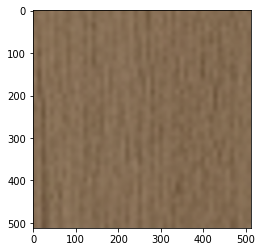

In [35]:
# https://stackoverflow.com/a/60883103/819544
from PIL import Image


def zoom(im, pct):
  # to do: check this is as advertized prior to camera ready
  h,w = im.size
  d = pct/2
  dh = d*h
  dw = d*w
  return im.crop((0+dw, 0+dh, w-dw, h-dh)).resize((h,w))

im_cropped = zoom(img, .9)
print(im_cropped.size)
plt.imshow(np.asarray(im_cropped))

In [18]:
!pip install keyframed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=0b4265bfaf8fc54ff1aecf0b104ac8a5ef7b068251a14ed138bf198f3ebd516a
  Stored in directory: /root/.cache/pip/wheels/23/cf/80/f3efa822e6ab23277902ee9165fe772eeb1dfb8014f359020a
Successfully built antlr4-python3-runtime


In [19]:
from keyframed import Curve

c = Curve(list(zip(times, o_env_threshed)), default_interpolation='linear')

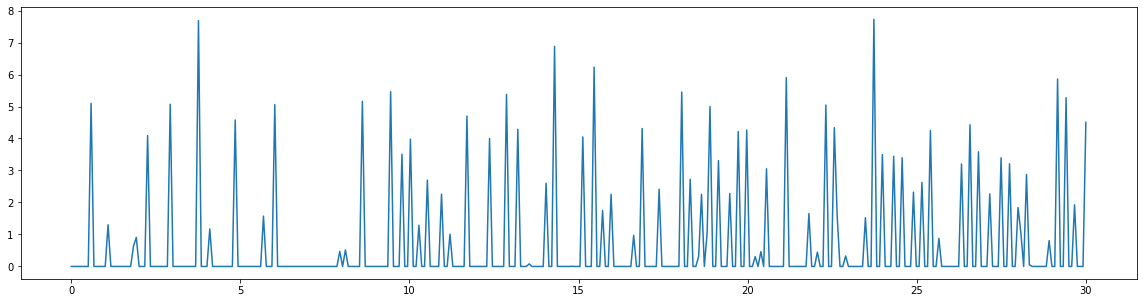

In [29]:
t = 30
fps=12
xs = np.linspace(0,t, t*fps)
ys = np.array([c[x] for x in xs])
plt.figure(figsize=(20,5))
plt.plot(xs, ys)

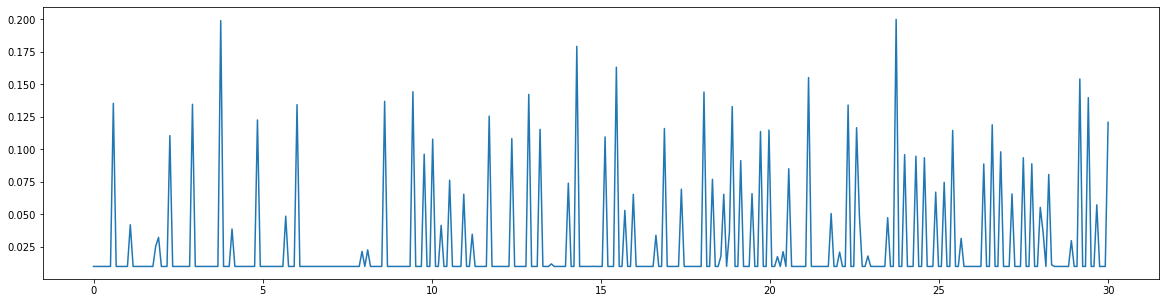

In [32]:
max_zoom=.2
min_zoom=.01
ys2 = (max_zoom-min_zoom)*(ys/max(ys)) + min_zoom

plt.figure(figsize=(20,5))
plt.plot(xs, ys2)


INFO:stability_sdk.client:Sending request.


0 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 8b701032-f740-424b-b3e5-806d7451996c in 0.24s
INFO:stability_sdk.client:Got keepalive 8b701032-f740-424b-b3e5-806d7451996c in 1.52s
INFO:stability_sdk.client:Got answer 8b701032-f740-424b-b3e5-806d7451996c with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.14s


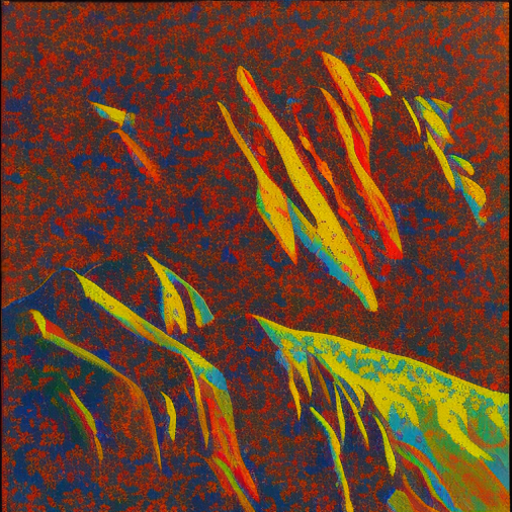

INFO:stability_sdk.client:Sending request.


1 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 820e7bd8-6563-4f9e-873c-c87876c31738 in 0.34s
INFO:stability_sdk.client:Got keepalive 820e7bd8-6563-4f9e-873c-c87876c31738 in 1.93s
INFO:stability_sdk.client:Got answer 820e7bd8-6563-4f9e-873c-c87876c31738 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s
INFO:stability_sdk.client:Sending request.


2 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 548b45d8-8e20-492e-bcf8-ae7a2c768834 in 0.32s
INFO:stability_sdk.client:Got keepalive 548b45d8-8e20-492e-bcf8-ae7a2c768834 in 2.16s
INFO:stability_sdk.client:Got answer 548b45d8-8e20-492e-bcf8-ae7a2c768834 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


3 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive c4630a6d-cbab-43b2-bae7-6b9e5eb274e2 in 0.34s
INFO:stability_sdk.client:Got keepalive c4630a6d-cbab-43b2-bae7-6b9e5eb274e2 in 1.58s
INFO:stability_sdk.client:Got answer c4630a6d-cbab-43b2-bae7-6b9e5eb274e2 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.32s
INFO:stability_sdk.client:Sending request.


4 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 72fafaf9-a03c-4c54-a67a-0aed524a2219 in 0.31s
INFO:stability_sdk.client:Got keepalive 72fafaf9-a03c-4c54-a67a-0aed524a2219 in 2.18s
INFO:stability_sdk.client:Got answer 72fafaf9-a03c-4c54-a67a-0aed524a2219 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


5 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 24f72956-0edc-4a4a-b580-b81810ed770b in 0.36s
INFO:stability_sdk.client:Got keepalive 24f72956-0edc-4a4a-b580-b81810ed770b in 1.64s
INFO:stability_sdk.client:Got answer 24f72956-0edc-4a4a-b580-b81810ed770b with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


6 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive f9ee753d-cbba-419a-bbae-a362a84a0a8d in 0.34s
INFO:stability_sdk.client:Got keepalive f9ee753d-cbba-419a-bbae-a362a84a0a8d in 2.12s
INFO:stability_sdk.client:Got answer f9ee753d-cbba-419a-bbae-a362a84a0a8d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


7 0.1354225981004218
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 97e00009-cc43-47e1-99b0-0ba6f8c52b96 in 0.32s
INFO:stability_sdk.client:Got keepalive 97e00009-cc43-47e1-99b0-0ba6f8c52b96 in 2.04s
INFO:stability_sdk.client:Got answer 97e00009-cc43-47e1-99b0-0ba6f8c52b96 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


8 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 7ce42d4d-7367-414d-a4a4-b19ebcb30eb8 in 0.31s
INFO:stability_sdk.client:Got keepalive 7ce42d4d-7367-414d-a4a4-b19ebcb30eb8 in 2.05s
INFO:stability_sdk.client:Got answer 7ce42d4d-7367-414d-a4a4-b19ebcb30eb8 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


9 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive a924cdda-1296-4f93-b234-d2db52d80890 in 0.31s
INFO:stability_sdk.client:Got keepalive a924cdda-1296-4f93-b234-d2db52d80890 in 2.18s
INFO:stability_sdk.client:Got answer a924cdda-1296-4f93-b234-d2db52d80890 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


10 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 791c1f4a-a7c1-45d6-ae52-b0749bdb9509 in 0.34s
INFO:stability_sdk.client:Got keepalive 791c1f4a-a7c1-45d6-ae52-b0749bdb9509 in 1.65s
INFO:stability_sdk.client:Got answer 791c1f4a-a7c1-45d6-ae52-b0749bdb9509 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s


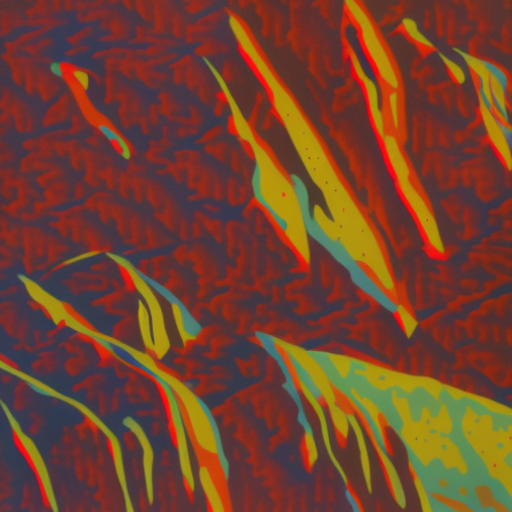

INFO:stability_sdk.client:Sending request.


11 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 99e39634-b4ba-4ee0-abf5-711c720619d5 in 0.31s
INFO:stability_sdk.client:Got keepalive 99e39634-b4ba-4ee0-abf5-711c720619d5 in 2.06s
INFO:stability_sdk.client:Got answer 99e39634-b4ba-4ee0-abf5-711c720619d5 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


12 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 022dea79-94b0-4dcf-bfbb-0c21aeb4b470 in 0.36s
INFO:stability_sdk.client:Got keepalive 022dea79-94b0-4dcf-bfbb-0c21aeb4b470 in 2.04s
INFO:stability_sdk.client:Got answer 022dea79-94b0-4dcf-bfbb-0c21aeb4b470 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.15s
INFO:stability_sdk.client:Sending request.


13 0.04206257980714558
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 0c08899a-44a1-447b-bd15-4bc770bd263c in 0.31s
INFO:stability_sdk.client:Got keepalive 0c08899a-44a1-447b-bd15-4bc770bd263c in 2.17s
INFO:stability_sdk.client:Got answer 0c08899a-44a1-447b-bd15-4bc770bd263c with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


14 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive dd220c69-216d-4ace-8c0d-1f07c7cef463 in 0.30s
INFO:stability_sdk.client:Got keepalive dd220c69-216d-4ace-8c0d-1f07c7cef463 in 2.03s
INFO:stability_sdk.client:Got answer dd220c69-216d-4ace-8c0d-1f07c7cef463 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


15 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 003c4a5c-595b-4933-8005-05c8167089d4 in 0.31s
INFO:stability_sdk.client:Got keepalive 003c4a5c-595b-4933-8005-05c8167089d4 in 1.99s
INFO:stability_sdk.client:Got answer 003c4a5c-595b-4933-8005-05c8167089d4 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


16 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive c2cf6ad6-05b3-4a59-946f-e77760dc7d1a in 0.34s
INFO:stability_sdk.client:Got keepalive c2cf6ad6-05b3-4a59-946f-e77760dc7d1a in 2.11s
INFO:stability_sdk.client:Got answer c2cf6ad6-05b3-4a59-946f-e77760dc7d1a with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


17 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 221b4f1a-3405-4812-8ba6-6e9b2bd976b8 in 0.32s
INFO:stability_sdk.client:Got keepalive 221b4f1a-3405-4812-8ba6-6e9b2bd976b8 in 1.99s
INFO:stability_sdk.client:Got answer 221b4f1a-3405-4812-8ba6-6e9b2bd976b8 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


18 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive df0c1a60-bf51-47a6-a65f-61b265f2210f in 0.31s
INFO:stability_sdk.client:Got keepalive df0c1a60-bf51-47a6-a65f-61b265f2210f in 1.99s
INFO:stability_sdk.client:Got answer df0c1a60-bf51-47a6-a65f-61b265f2210f with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


19 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive a250e5a3-fae0-45ca-bafd-9d1b222866f6 in 0.30s
INFO:stability_sdk.client:Got keepalive a250e5a3-fae0-45ca-bafd-9d1b222866f6 in 2.06s
INFO:stability_sdk.client:Got answer a250e5a3-fae0-45ca-bafd-9d1b222866f6 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


20 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive fee9a802-f68d-4393-a527-159ea1c635e6 in 0.42s
INFO:stability_sdk.client:Got keepalive fee9a802-f68d-4393-a527-159ea1c635e6 in 1.66s
INFO:stability_sdk.client:Got answer fee9a802-f68d-4393-a527-159ea1c635e6 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s


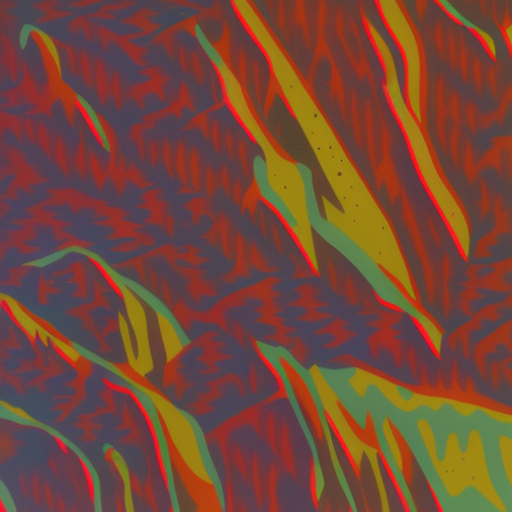

INFO:stability_sdk.client:Sending request.


21 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 4e3eb99c-a4d2-4e5f-bd0f-3fdcdd52364a in 0.35s
INFO:stability_sdk.client:Got keepalive 4e3eb99c-a4d2-4e5f-bd0f-3fdcdd52364a in 1.70s
INFO:stability_sdk.client:Got answer 4e3eb99c-a4d2-4e5f-bd0f-3fdcdd52364a with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


22 0.025633067707542763
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive a2af6541-0b7d-4ec0-b7b7-e7a7fd411119 in 0.32s
INFO:stability_sdk.client:Got keepalive a2af6541-0b7d-4ec0-b7b7-e7a7fd411119 in 2.02s
INFO:stability_sdk.client:Got answer a2af6541-0b7d-4ec0-b7b7-e7a7fd411119 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


23 0.03234203270497831
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive f76fd874-85a3-45ee-83f8-d9ba16d1985b in 0.31s
INFO:stability_sdk.client:Got keepalive f76fd874-85a3-45ee-83f8-d9ba16d1985b in 2.01s
INFO:stability_sdk.client:Got answer f76fd874-85a3-45ee-83f8-d9ba16d1985b with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


24 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 5887fe89-0fa7-47d8-a620-e62f8bc91f30 in 0.32s
INFO:stability_sdk.client:Got keepalive 5887fe89-0fa7-47d8-a620-e62f8bc91f30 in 2.06s
INFO:stability_sdk.client:Got answer 5887fe89-0fa7-47d8-a620-e62f8bc91f30 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


25 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive dc6b79e7-db55-42d8-b24f-2c2470248149 in 0.35s
INFO:stability_sdk.client:Got keepalive dc6b79e7-db55-42d8-b24f-2c2470248149 in 2.04s
INFO:stability_sdk.client:Got answer dc6b79e7-db55-42d8-b24f-2c2470248149 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


26 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive eb1d7d18-05a2-4b3f-8739-52bddf80233f in 0.34s
INFO:stability_sdk.client:Got keepalive eb1d7d18-05a2-4b3f-8739-52bddf80233f in 2.19s
INFO:stability_sdk.client:Got answer eb1d7d18-05a2-4b3f-8739-52bddf80233f with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.08s
INFO:stability_sdk.client:Sending request.


27 0.11061210202595913
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 09c54cbc-9b50-4400-87aa-741ca520083d in 0.30s
INFO:stability_sdk.client:Got keepalive 09c54cbc-9b50-4400-87aa-741ca520083d in 2.04s
INFO:stability_sdk.client:Got answer 09c54cbc-9b50-4400-87aa-741ca520083d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


28 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 7cb1372d-ef11-432b-8a91-6fb654bd1deb in 0.30s
INFO:stability_sdk.client:Got keepalive 7cb1372d-ef11-432b-8a91-6fb654bd1deb in 2.04s
INFO:stability_sdk.client:Got answer 7cb1372d-ef11-432b-8a91-6fb654bd1deb with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


29 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 25d35e33-49a7-44cf-83e6-9dcf23290d7b in 0.34s
INFO:stability_sdk.client:Got keepalive 25d35e33-49a7-44cf-83e6-9dcf23290d7b in 1.72s
INFO:stability_sdk.client:Got answer 25d35e33-49a7-44cf-83e6-9dcf23290d7b with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


30 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive af35279c-7e60-4f47-9542-10e51aadff3e in 0.32s
INFO:stability_sdk.client:Got keepalive af35279c-7e60-4f47-9542-10e51aadff3e in 1.62s
INFO:stability_sdk.client:Got answer af35279c-7e60-4f47-9542-10e51aadff3e with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s


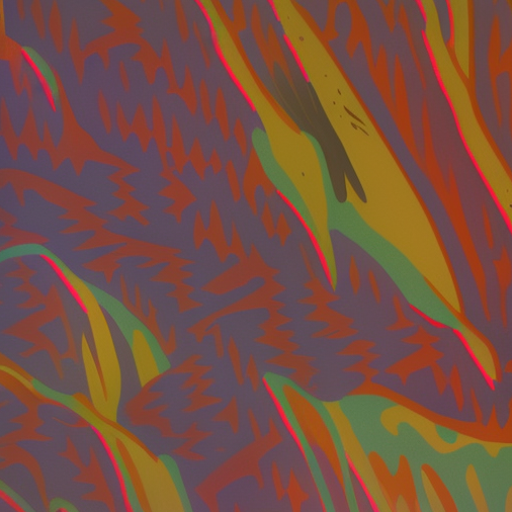

INFO:stability_sdk.client:Sending request.


31 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 42e535f4-078b-451f-84b8-3a9a22160040 in 0.35s
INFO:stability_sdk.client:Got keepalive 42e535f4-078b-451f-84b8-3a9a22160040 in 2.05s
INFO:stability_sdk.client:Got answer 42e535f4-078b-451f-84b8-3a9a22160040 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


32 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 26698a24-dbe1-464a-b85c-39ebc3cee7d6 in 0.40s
INFO:stability_sdk.client:Got keepalive 26698a24-dbe1-464a-b85c-39ebc3cee7d6 in 2.09s
INFO:stability_sdk.client:Got answer 26698a24-dbe1-464a-b85c-39ebc3cee7d6 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


33 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 9c941199-115d-437f-87e8-4b1fc9da22c6 in 0.31s
INFO:stability_sdk.client:Got keepalive 9c941199-115d-437f-87e8-4b1fc9da22c6 in 1.74s
INFO:stability_sdk.client:Got answer 9c941199-115d-437f-87e8-4b1fc9da22c6 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


34 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 67b32930-7036-4913-b5f2-a6f3e7ef196b in 0.30s
INFO:stability_sdk.client:Got keepalive 67b32930-7036-4913-b5f2-a6f3e7ef196b in 2.02s
INFO:stability_sdk.client:Got answer 67b32930-7036-4913-b5f2-a6f3e7ef196b with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


35 0.13466962623556022
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 220f8d5e-cdd2-41af-8c4d-c7487c7b3f9e in 0.30s
INFO:stability_sdk.client:Got keepalive 220f8d5e-cdd2-41af-8c4d-c7487c7b3f9e in 2.03s
INFO:stability_sdk.client:Got answer 220f8d5e-cdd2-41af-8c4d-c7487c7b3f9e with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


36 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 0127c5e6-65bc-4df7-bc01-aadb308963e3 in 0.30s
INFO:stability_sdk.client:Got keepalive 0127c5e6-65bc-4df7-bc01-aadb308963e3 in 2.03s
INFO:stability_sdk.client:Got answer 0127c5e6-65bc-4df7-bc01-aadb308963e3 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


37 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive c791b41b-6393-499e-8b73-fd5927ddeb6d in 0.33s
INFO:stability_sdk.client:Got keepalive c791b41b-6393-499e-8b73-fd5927ddeb6d in 1.69s
INFO:stability_sdk.client:Got answer c791b41b-6393-499e-8b73-fd5927ddeb6d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.14s
INFO:stability_sdk.client:Sending request.


38 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 01056e32-56e3-4b9c-a9cc-0271b0ff8d3b in 0.31s
INFO:stability_sdk.client:Got keepalive 01056e32-56e3-4b9c-a9cc-0271b0ff8d3b in 1.99s
INFO:stability_sdk.client:Got answer 01056e32-56e3-4b9c-a9cc-0271b0ff8d3b with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


39 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive bd1929cc-9157-48ee-8c45-c9cf4ff95fda in 0.34s
INFO:stability_sdk.client:Got keepalive bd1929cc-9157-48ee-8c45-c9cf4ff95fda in 1.73s
INFO:stability_sdk.client:Got answer bd1929cc-9157-48ee-8c45-c9cf4ff95fda with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s
INFO:stability_sdk.client:Sending request.


40 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive e38d7f3a-a25e-4c10-9834-7b61b6753196 in 0.33s
INFO:stability_sdk.client:Got keepalive e38d7f3a-a25e-4c10-9834-7b61b6753196 in 1.74s
INFO:stability_sdk.client:Got answer e38d7f3a-a25e-4c10-9834-7b61b6753196 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s


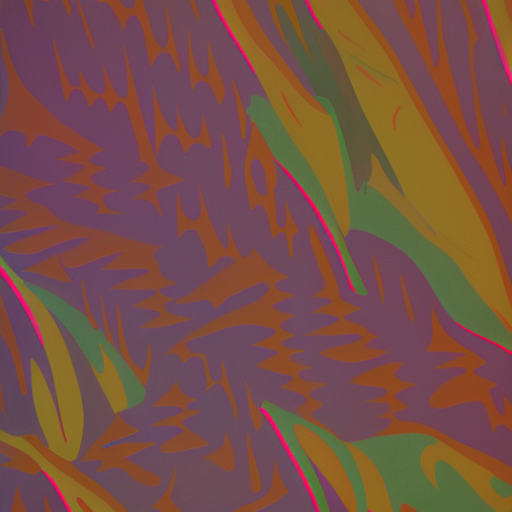

INFO:stability_sdk.client:Sending request.


41 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 7c3784a1-eea5-4354-b068-c91f83ca7506 in 0.35s
INFO:stability_sdk.client:Got keepalive 7c3784a1-eea5-4354-b068-c91f83ca7506 in 1.73s
INFO:stability_sdk.client:Got answer 7c3784a1-eea5-4354-b068-c91f83ca7506 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


42 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 79478f8b-0a7b-43f6-8df4-1da78e6428c8 in 0.31s
INFO:stability_sdk.client:Got keepalive 79478f8b-0a7b-43f6-8df4-1da78e6428c8 in 2.02s
INFO:stability_sdk.client:Got answer 79478f8b-0a7b-43f6-8df4-1da78e6428c8 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


43 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 37cee140-b2b7-4423-b201-0529da566469 in 0.31s
INFO:stability_sdk.client:Got keepalive 37cee140-b2b7-4423-b201-0529da566469 in 2.18s
INFO:stability_sdk.client:Got answer 37cee140-b2b7-4423-b201-0529da566469 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s


44 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive f491b7d1-289f-447a-a371-d128e83380e7 in 0.30s
INFO:stability_sdk.client:Got keepalive f491b7d1-289f-447a-a371-d128e83380e7 in 1.99s
INFO:stability_sdk.client:Got answer f491b7d1-289f-447a-a371-d128e83380e7 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


45 0.19901817807841926
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 26ec9ccc-65b1-42bf-a670-9ff87c952cd8 in 0.33s
INFO:stability_sdk.client:Got keepalive 26ec9ccc-65b1-42bf-a670-9ff87c952cd8 in 1.70s
INFO:stability_sdk.client:Got answer 26ec9ccc-65b1-42bf-a670-9ff87c952cd8 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


46 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 0bf84957-983b-4146-b67d-83690ff6157c in 0.33s
INFO:stability_sdk.client:Got keepalive 0bf84957-983b-4146-b67d-83690ff6157c in 1.68s
INFO:stability_sdk.client:Got answer 0bf84957-983b-4146-b67d-83690ff6157c with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.13s
INFO:stability_sdk.client:Sending request.


47 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 821d7333-ef4c-46dc-b11a-acd94f440fc7 in 0.35s
INFO:stability_sdk.client:Got keepalive 821d7333-ef4c-46dc-b11a-acd94f440fc7 in 1.67s
INFO:stability_sdk.client:Got answer 821d7333-ef4c-46dc-b11a-acd94f440fc7 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s
INFO:stability_sdk.client:Sending request.


48 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 0cdcbbae-daea-4692-b86e-82d0ba91f4c3 in 0.36s
INFO:stability_sdk.client:Got keepalive 0cdcbbae-daea-4692-b86e-82d0ba91f4c3 in 2.03s
INFO:stability_sdk.client:Got answer 0cdcbbae-daea-4692-b86e-82d0ba91f4c3 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.14s
INFO:stability_sdk.client:Sending request.


49 0.038803215352900176
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive bbfba351-1038-4f9e-9b79-56cf6857d673 in 0.29s
INFO:stability_sdk.client:Got keepalive bbfba351-1038-4f9e-9b79-56cf6857d673 in 2.00s
INFO:stability_sdk.client:Got answer bbfba351-1038-4f9e-9b79-56cf6857d673 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


50 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 4b3c75fa-a35a-4e9f-8aad-85441377bfe2 in 0.38s
INFO:stability_sdk.client:Got keepalive 4b3c75fa-a35a-4e9f-8aad-85441377bfe2 in 1.66s
INFO:stability_sdk.client:Got answer 4b3c75fa-a35a-4e9f-8aad-85441377bfe2 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.14s


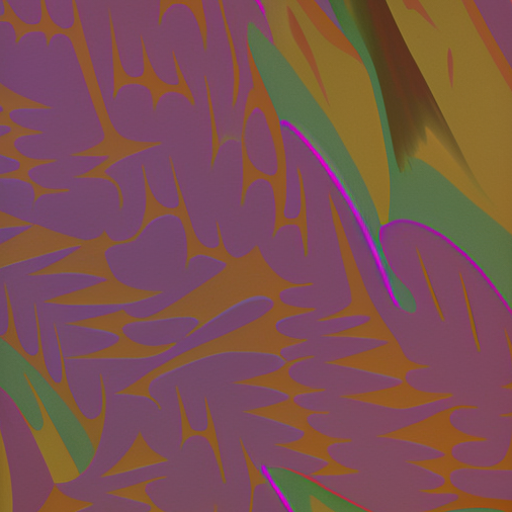

INFO:stability_sdk.client:Sending request.


51 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 67aabcea-8334-45f5-9c46-d6f2db3fa659 in 0.29s
INFO:stability_sdk.client:Got keepalive 67aabcea-8334-45f5-9c46-d6f2db3fa659 in 2.17s
INFO:stability_sdk.client:Got answer 67aabcea-8334-45f5-9c46-d6f2db3fa659 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


52 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive b8f16a05-1fa8-4d8d-b4d5-15306b5ab6ba in 0.31s
INFO:stability_sdk.client:Got keepalive b8f16a05-1fa8-4d8d-b4d5-15306b5ab6ba in 2.01s
INFO:stability_sdk.client:Got answer b8f16a05-1fa8-4d8d-b4d5-15306b5ab6ba with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


53 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 2aab341f-5dcb-4334-860d-bac4cb7c667a in 0.30s
INFO:stability_sdk.client:Got keepalive 2aab341f-5dcb-4334-860d-bac4cb7c667a in 1.98s
INFO:stability_sdk.client:Got answer 2aab341f-5dcb-4334-860d-bac4cb7c667a with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s
INFO:stability_sdk.client:Sending request.


54 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive cd1e5d64-1c8b-4c44-8c8a-00b2a61bc02d in 0.42s
INFO:stability_sdk.client:Got keepalive cd1e5d64-1c8b-4c44-8c8a-00b2a61bc02d in 1.66s
INFO:stability_sdk.client:Got answer cd1e5d64-1c8b-4c44-8c8a-00b2a61bc02d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s
INFO:stability_sdk.client:Sending request.


55 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive aabd626c-6c76-4fc8-9257-356a37dfe514 in 0.29s
INFO:stability_sdk.client:Got keepalive aabd626c-6c76-4fc8-9257-356a37dfe514 in 2.01s
INFO:stability_sdk.client:Got answer aabd626c-6c76-4fc8-9257-356a37dfe514 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


56 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 5d79b921-e5bf-4c0c-bf3a-6076ada6168e in 0.34s
INFO:stability_sdk.client:Got keepalive 5d79b921-e5bf-4c0c-bf3a-6076ada6168e in 1.60s
INFO:stability_sdk.client:Got answer 5d79b921-e5bf-4c0c-bf3a-6076ada6168e with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.16s
INFO:stability_sdk.client:Sending request.


57 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 367aac72-8f83-43ef-9a39-96fa2b1ddd55 in 0.30s
INFO:stability_sdk.client:Got keepalive 367aac72-8f83-43ef-9a39-96fa2b1ddd55 in 1.97s
INFO:stability_sdk.client:Got answer 367aac72-8f83-43ef-9a39-96fa2b1ddd55 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


58 0.12264215414875639
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 5350b750-ae5f-42e4-9a5c-868b4695cb1b in 0.33s
INFO:stability_sdk.client:Got keepalive 5350b750-ae5f-42e4-9a5c-868b4695cb1b in 1.72s
INFO:stability_sdk.client:Got answer 5350b750-ae5f-42e4-9a5c-868b4695cb1b with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s
INFO:stability_sdk.client:Sending request.


59 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 0475883c-66dc-432e-989a-7f017a2aab3a in 0.29s
INFO:stability_sdk.client:Got keepalive 0475883c-66dc-432e-989a-7f017a2aab3a in 1.98s
INFO:stability_sdk.client:Got answer 0475883c-66dc-432e-989a-7f017a2aab3a with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


60 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 24b4614a-7f9b-49f5-a8ff-92d0c061e066 in 0.34s
INFO:stability_sdk.client:Got keepalive 24b4614a-7f9b-49f5-a8ff-92d0c061e066 in 1.67s
INFO:stability_sdk.client:Got answer 24b4614a-7f9b-49f5-a8ff-92d0c061e066 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.14s
<ipython-input-15-5603d38f80d5>:5: UserWarning: Your request activated the API's safety filters and could not be processed.Please modify the prompt and try again.
  warnings.warn(


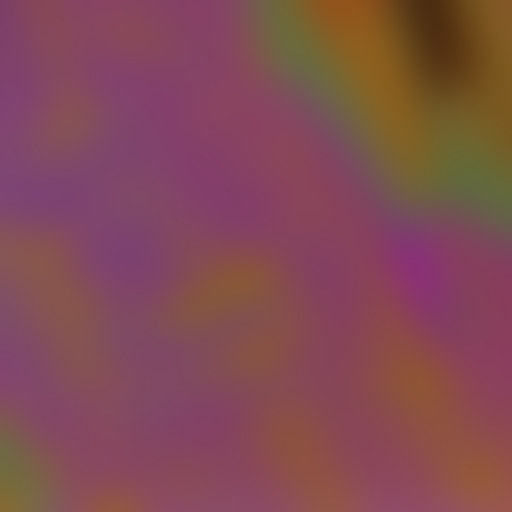

INFO:stability_sdk.client:Sending request.


61 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 5bb0c0ca-3964-41d0-9142-195a843900b0 in 0.34s
INFO:stability_sdk.client:Got keepalive 5bb0c0ca-3964-41d0-9142-195a843900b0 in 1.60s
INFO:stability_sdk.client:Got answer 5bb0c0ca-3964-41d0-9142-195a843900b0 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.12s
INFO:stability_sdk.client:Sending request.


62 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 95654ae9-b1b5-4cf6-8c94-f482e6400718 in 0.32s
INFO:stability_sdk.client:Got keepalive 95654ae9-b1b5-4cf6-8c94-f482e6400718 in 1.62s
INFO:stability_sdk.client:Got answer 95654ae9-b1b5-4cf6-8c94-f482e6400718 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.14s
INFO:stability_sdk.client:Sending request.


63 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 601c9e03-41fc-49ca-b6c2-32b4dd303029 in 0.30s
INFO:stability_sdk.client:Got keepalive 601c9e03-41fc-49ca-b6c2-32b4dd303029 in 1.54s
INFO:stability_sdk.client:Got answer 601c9e03-41fc-49ca-b6c2-32b4dd303029 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


64 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive e7f1e5fb-79c5-4c29-9353-131406a2cb8d in 0.27s
INFO:stability_sdk.client:Got keepalive e7f1e5fb-79c5-4c29-9353-131406a2cb8d in 1.94s
INFO:stability_sdk.client:Got answer e7f1e5fb-79c5-4c29-9353-131406a2cb8d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


65 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive d77397bf-8564-4ca2-b489-2e036027021d in 0.29s
INFO:stability_sdk.client:Got keepalive d77397bf-8564-4ca2-b489-2e036027021d in 1.99s
INFO:stability_sdk.client:Got answer d77397bf-8564-4ca2-b489-2e036027021d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


66 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 1f9c1a09-bbf1-43de-9cdb-0e9554981707 in 0.28s
INFO:stability_sdk.client:Got keepalive 1f9c1a09-bbf1-43de-9cdb-0e9554981707 in 1.93s
INFO:stability_sdk.client:Got answer 1f9c1a09-bbf1-43de-9cdb-0e9554981707 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


67 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive d69719e8-2897-4b3a-aa10-959463d65495 in 0.28s
INFO:stability_sdk.client:Got keepalive d69719e8-2897-4b3a-aa10-959463d65495 in 1.57s
INFO:stability_sdk.client:Got answer d69719e8-2897-4b3a-aa10-959463d65495 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


68 0.04868365880788254
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 4851638d-da68-47ee-802e-25e8a27bdda3 in 0.28s
INFO:stability_sdk.client:Got keepalive 4851638d-da68-47ee-802e-25e8a27bdda3 in 2.00s
INFO:stability_sdk.client:Got answer 4851638d-da68-47ee-802e-25e8a27bdda3 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


69 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 7785b9e6-00b9-4905-9165-03fba227c93c in 0.29s
INFO:stability_sdk.client:Got keepalive 7785b9e6-00b9-4905-9165-03fba227c93c in 1.55s
INFO:stability_sdk.client:Got answer 7785b9e6-00b9-4905-9165-03fba227c93c with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


70 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 4bf506d2-4035-4e5d-b172-56b4ab69b2ea in 0.29s
INFO:stability_sdk.client:Got keepalive 4bf506d2-4035-4e5d-b172-56b4ab69b2ea in 1.62s
INFO:stability_sdk.client:Got answer 4bf506d2-4035-4e5d-b172-56b4ab69b2ea with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s


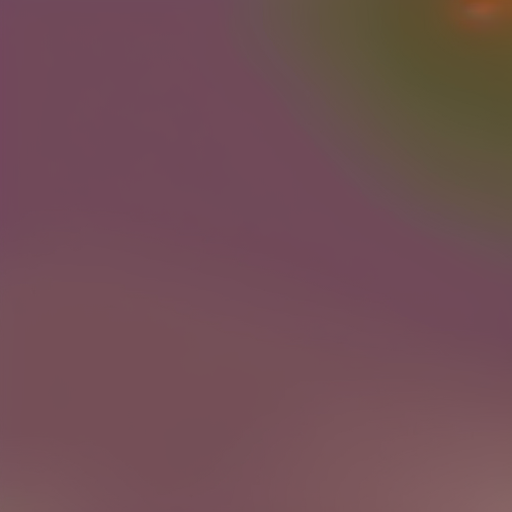

INFO:stability_sdk.client:Sending request.


71 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 7e5e474e-5afb-469a-850f-d40c2b2cf4e0 in 0.31s
INFO:stability_sdk.client:Got keepalive 7e5e474e-5afb-469a-850f-d40c2b2cf4e0 in 1.63s
INFO:stability_sdk.client:Got answer 7e5e474e-5afb-469a-850f-d40c2b2cf4e0 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


72 0.13445190016232894
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive b07d672f-0a78-4cb0-8d4b-590c2afed119 in 0.31s
INFO:stability_sdk.client:Got keepalive b07d672f-0a78-4cb0-8d4b-590c2afed119 in 1.59s
INFO:stability_sdk.client:Got answer b07d672f-0a78-4cb0-8d4b-590c2afed119 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


73 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 10a0cb22-4174-4cc6-92c4-4e020fc6b86d in 0.42s
INFO:stability_sdk.client:Got keepalive 10a0cb22-4174-4cc6-92c4-4e020fc6b86d in 1.88s
INFO:stability_sdk.client:Got answer 10a0cb22-4174-4cc6-92c4-4e020fc6b86d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.09s
INFO:stability_sdk.client:Sending request.


74 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 0301eba1-0275-4e5f-ac01-4e5bbd2e7a7f in 0.31s
INFO:stability_sdk.client:Got keepalive 0301eba1-0275-4e5f-ac01-4e5bbd2e7a7f in 1.50s
INFO:stability_sdk.client:Got answer 0301eba1-0275-4e5f-ac01-4e5bbd2e7a7f with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


75 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive a1c5f8c5-030c-4432-9d42-4c05d581693c in 0.28s
INFO:stability_sdk.client:Got keepalive a1c5f8c5-030c-4432-9d42-4c05d581693c in 1.57s
INFO:stability_sdk.client:Got answer a1c5f8c5-030c-4432-9d42-4c05d581693c with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


76 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 06a27233-d7f0-478a-b677-b1de5627e9ea in 0.27s
INFO:stability_sdk.client:Got keepalive 06a27233-d7f0-478a-b677-b1de5627e9ea in 1.51s
INFO:stability_sdk.client:Got answer 06a27233-d7f0-478a-b677-b1de5627e9ea with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


77 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 3f1fa31b-c32f-40a8-93f5-28e0990161c7 in 0.28s
INFO:stability_sdk.client:Got keepalive 3f1fa31b-c32f-40a8-93f5-28e0990161c7 in 1.54s
INFO:stability_sdk.client:Got answer 3f1fa31b-c32f-40a8-93f5-28e0990161c7 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


78 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive cb012150-1d64-4a73-b5a1-97d2bb095cd3 in 0.26s
INFO:stability_sdk.client:Got keepalive cb012150-1d64-4a73-b5a1-97d2bb095cd3 in 2.02s
INFO:stability_sdk.client:Got answer cb012150-1d64-4a73-b5a1-97d2bb095cd3 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


79 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive e07c27bd-413f-40dd-90f1-68ee10683565 in 0.27s
INFO:stability_sdk.client:Got keepalive e07c27bd-413f-40dd-90f1-68ee10683565 in 1.93s
INFO:stability_sdk.client:Got answer e07c27bd-413f-40dd-90f1-68ee10683565 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s
INFO:stability_sdk.client:Sending request.


80 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 41f9b602-6d51-4c3e-86f0-c60ae593af4d in 0.28s
INFO:stability_sdk.client:Got keepalive 41f9b602-6d51-4c3e-86f0-c60ae593af4d in 1.92s
INFO:stability_sdk.client:Got answer 41f9b602-6d51-4c3e-86f0-c60ae593af4d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s


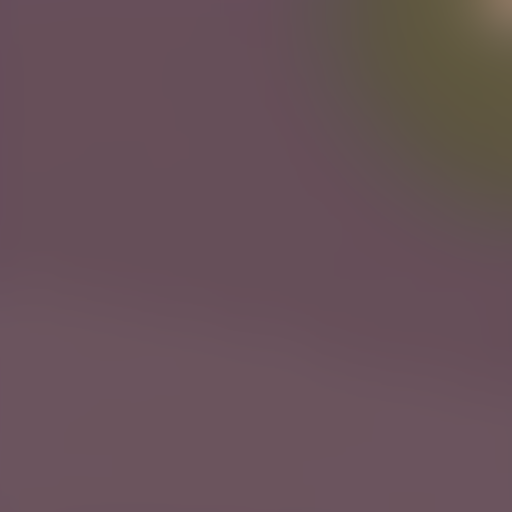

INFO:stability_sdk.client:Sending request.


81 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive e6439713-f754-44f9-9d02-c13e75664f8d in 0.26s
INFO:stability_sdk.client:Got keepalive e6439713-f754-44f9-9d02-c13e75664f8d in 1.91s
INFO:stability_sdk.client:Got answer e6439713-f754-44f9-9d02-c13e75664f8d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.08s
INFO:stability_sdk.client:Sending request.


82 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive ad7b8035-32d2-4bc1-a6d3-048cd75a6745 in 0.28s
INFO:stability_sdk.client:Got keepalive ad7b8035-32d2-4bc1-a6d3-048cd75a6745 in 1.88s
INFO:stability_sdk.client:Got answer ad7b8035-32d2-4bc1-a6d3-048cd75a6745 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.10s
INFO:stability_sdk.client:Sending request.


83 0.01
yosemite national park, landscape, splatter painting by chuck close:1


INFO:stability_sdk.client:Got keepalive 1041885e-761c-4f1b-a364-491086e3bd62 in 0.25s


KeyboardInterrupt: ignored

In [42]:
from IPython.display import display


show_every=10

prompt_strength=.1
images = []
seed = 0
for i, z in enumerate(ys2):
    print(i,z)
    seed+=1
    answers = stability_api.generate(
        prompt= make_multiprompt("yosemite national park, landscape, splatter painting by chuck close:1"), 
        seed=seed,
        steps=30,
        init_image=img if images else None,
        start_schedule=prompt_strength,
    )

    img = get_img_from_response(answers)
    img = zoom(img, z)
    images.append(img)

    if i % show_every == 0:
        display(img)

In [43]:
for i, im in enumerate(images):
    #with open(f'frame_{i:04}.png', 'w') as f:
    im.save(f'frame_{i:04}.png')

In [45]:
!ffmpeg -y -r {fps} -i 'frame_%*.png' -i music.mp3 -crf 15 -preset veryfast -pix_fmt yuv420p -shortest out.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [47]:
from IPython.display import Video

Video('out.mp4', embed=True)